In [42]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import os

os.chdir("E:/EBAC/Material/10 - Modelos de regresión lineal y series de tiempo")
df = pd.read_csv("TempNY.csv")
df = df.drop("Unnamed: 2", axis = 1)
df.index = df["Year"]
df = df.drop("Year", axis = 1)
df

,Average
Year,
1870,53.60
1871,51.13
1872,50.98
1873,50.98
1874,51.34
...,...
2016,57.18
2017,56.22
2018,55.88


<Axes: xlabel='Year'>

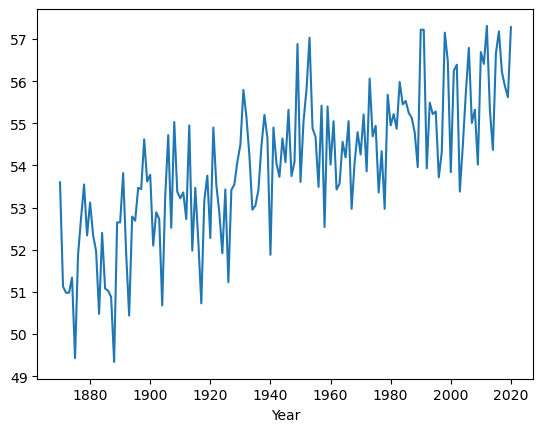

In [3]:
df["Average"].plot()

In [29]:
# Realizacion de la prueba Dickey-Fuller
# H0: La serie es NO ESTACIONARIA
# Ha: La serie SI ES ESTACIONARIA

from statsmodels.tsa.stattools import adfuller

# Tomar el 90% como base de entrenamiento
size = int(len(df) * 0.9)
df_90 = df[:size]

# Realizar Dickey-Fuller en el 90% de la data
adf_test = adfuller(df_90)

print("ADF Statistic:", adf_test[0])
print("El valor p de la prueba de Dickey-Fuller es: ", adf_test[1])
print("Valores Criticos: ", adf_test[4])


ADF Statistic: -1.7177091486133425
El valor p de la prueba de Dickey-Fuller es:  0.42201206191180785
Valores Criticos:  {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}


Con un valor p de 0.4220 no podemos rechazar la hipotesis nula, no podemos decir que es no estacionaria

In [12]:
# Aplicar diferencias
df_90["temp_change"] = df_90["Average"].diff()
df_90 = df_90.dropna()
df_90

,Average,temp_change
Year,,
1872,50.98,-0.15
1873,50.98,0.00
1874,51.34,0.36
1875,49.43,-1.91
1876,51.88,2.45
...,...,...
2000,53.84,-2.64
2001,56.25,2.41
2002,56.39,0.14


In [9]:
# Aplicacion de la prueba Dickey-Fuller sobre las diferencias
adf_test_dif = adfuller(df_90["temp_change"])
print("El valor p de la prueba Dickey-Fuller es: ", adf_test_dif[1])

El valor p de la prueba Dickey-Fuller es:  1.5713108896118464e-13


<Axes: xlabel='Year'>

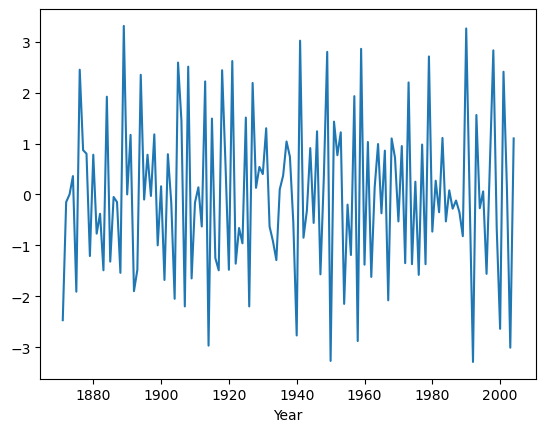

In [10]:
df_90["temp_change"].plot()

Conclusion: Aplicando las diferencias, podemos decir que la serie transformada de diferencias SI ES ESTACIONARIA

Solo se necesito realizar una diferencia por lo que en ARIMA, el valor a utilizar en d seria de 1

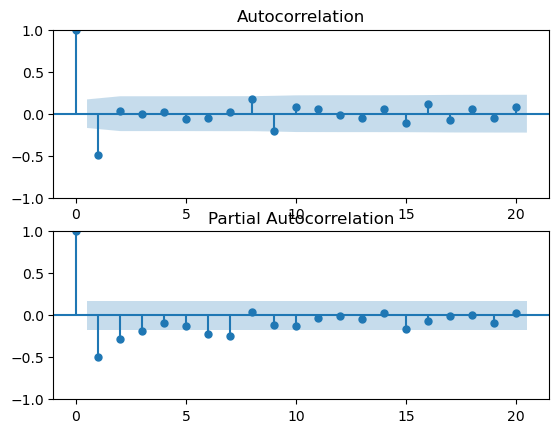

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(2,1)

# Graficacion de la funcion de autocorrelacion ACF
plot_acf(df_90["temp_change"], lags=20, ax = axes[0], alpha = 0.05)

# Graficacion de la funcion de autocorrelacion parcial PACF
plot_pacf(df_90["temp_change"], lags=20, ax = axes[1], alpha=0.05)

plt.show()

In [16]:
# Importacion del modulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajustar los datos a un model AR(1) e imprimir su AIC:
mod_ar1 = ARIMA(df_90["temp_change"], order = (1,0,0))
res_ar1 = mod_ar1.fit()
print("El AIC para AR(1) es: ", res_ar1.aic)

El AIC para AR(1) es:  458.1407953571194


In [19]:
# Importacion del modulo para estimar un modelo ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Ajustar los datos a un model AR(1) e imprimir su AIC:
mod_ar11 = ARIMA(df_90["temp_change"], order = (1,1,0))
res_ar11 = mod_ar1.fit()
print("El AIC para AR(1) es: ", res_ar1.aic)

El AIC para AR(1) es:  458.1407953571194


In [17]:
# Ajustar los datos a un model AR(2) e imprimir su AIC:
mod_ar2 = ARIMA(df_90["temp_change"], order = (2,0,0))
res_ar2 = mod_ar2.fit()
print("El AIC para AR(2) es: ", res_ar2.aic)

El AIC para AR(2) es:  448.9978463852327


In [20]:
# Ajustar los datos a un model AR(2) e imprimir su AIC:
mod_ar21 = ARIMA(df_90["temp_change"], order = (2,1,0))
res_ar21= mod_ar2.fit()
print("El AIC para AR(2) es: ", res_ar2.aic)

El AIC para AR(2) es:  448.9978463852327


In [18]:
# Ajustar los datos a un model ARMA(1,1) e imprimir su AIC:
mod_arma11 = ARIMA(df_90["temp_change"], order = (1,0,1))
res_arma11 = mod_arma11.fit()
print("El AIC para ARMA(1,1) es: ", res_arma11.aic)

El AIC para ARMA(1,1) es:  424.13541074806653


In [21]:
# Ajustar los datos a un model ARMA(1,1) e imprimir su AIC:
mod_arma111 = ARIMA(df_90["temp_change"], order = (1,1,1))
res_arma111 = mod_arma11.fit()
print("El AIC para ARMA(1,1) es: ", res_arma11.aic)

El AIC para ARMA(1,1) es:  424.13541074806653


### Al utilizar d = 1 podemos ver que no influencia en el resultado de ARIMA pero debido a la diferencia aplicada anteriormente, sabemos que 1 seria el valor optimo a utilizar por lo que el modelo a utilizar debe ser ARIMA(1,1,1)

In [25]:
# Importacion del modulo ARIMA de statsmodels
from statsmodels.graphics.tsaplots import plot_predict

# Pronostico de temperaturas usando un modelo ARIMA (1,1,1)
mod = ARIMA(df_90["Average"], order=(1,1,1))
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                Average   No. Observations:                  133
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -210.826
Date:                Thu, 13 Mar 2025   AIC                            427.651
Time:                        00:17:20   BIC                            436.300
Sample:                             0   HQIC                           431.166
                                - 133                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0611      0.116      0.527      0.598      -0.166       0.288
ma.L1         -0.8618      0.062    -14.001      0.000      -0.982      -0.741
sigma2         1.4147      0.209      6.762      0.0

In [54]:
#Tamaño de base de prueba
size_test = int(len(df) * 0.1)
df_test = df[size:]
size_test

15

In [33]:
# Pronostico puntual de la base de prueba
predicciones = res.forecast(15)
predicciones = pd.DataFrame(predicciones)
predicciones

,predicted_mean
133,55.061198
134,55.096704
135,55.098873
136,55.099006
137,55.099014
138,55.099014
139,55.099014
140,55.099014
141,55.099014
142,55.099014


In [50]:
fechas = df.reset_index()
fechas = pd.DataFrame(fechas["Year"])

frames = [fechas, predicciones]
result = pd.concat(frames, axis=1, join = "inner")
result.columns = ['Year', 'Predicciones']
result.index = result["Year"]
result.drop(columns=["Year"], inplace=True)
result

,Predicciones
Year,
2003,55.061198
2004,55.096704
2005,55.098873
2006,55.099006
2007,55.099014
2008,55.099014
2009,55.099014
2010,55.099014
2011,55.099014


In [32]:
# Pronostico por intervalo de los proximos 5 años
conf = res.get_forecast(15).conf_int(alpha=0.05)
conf

,lower Average,upper Average
133,52.729963,57.392433
134,52.719625,57.473783
135,52.696084,57.501662
136,52.671775,57.526237
137,52.647644,57.550384
138,52.623745,57.574284
139,52.600074,57.597955
140,52.576626,57.621403
141,52.553393,57.644636
142,52.530370,57.667659


In [51]:
frames = [fechas, conf]
intervalos = pd.concat(frames, axis=1, join = 'inner')
intervalos.index = intervalos['Year']
intervalos.drop(columns=["Year"], inplace=True)
intervalos

,lower Average,upper Average
Year,,
2003,52.729963,57.392433
2004,52.719625,57.473783
2005,52.696084,57.501662
2006,52.671775,57.526237
2007,52.647644,57.550384
2008,52.623745,57.574284
2009,52.600074,57.597955
2010,52.576626,57.621403
2011,52.553393,57.644636


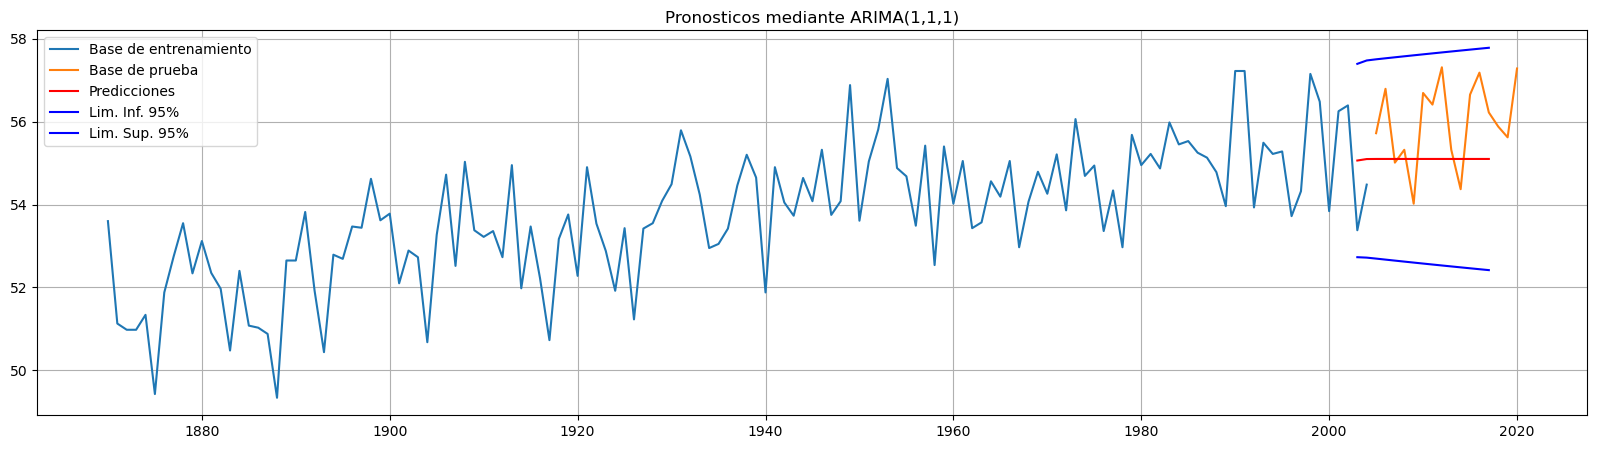

In [55]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(df_90, label = "Base de entrenamiento")
plt.plot(df_test, label = "Base de prueba")
plt.plot(result, label = "Predicciones", color = "red")
plt.plot(intervalos['lower Average'], label = "Lim. Inf. 95%", color = "blue")
plt.plot(intervalos['upper Average'], label = "Lim. Sup. 95%", color = "blue")
plt.legend(loc="best")
plt.title("Pronosticos mediante ARIMA(1,1,1)")
plt.show()

In [62]:
acumulador1 = 0
acumulador2 = 0

for contador in range(0, 15):
    acumulador1 = acumulador1 + (df_90.iloc[contador][0] - predicciones.iloc[contador][0]) ** 2
    acumulador2 = acumulador2 + np.abs((df_test.iloc[contador][0] - predicciones.iloc[contador][0]) /
                                       df_test.iloc[contador][0])
mse = acumulador1 / 15
rmse = np.round(np.sqrt(mse),2)
mape = np.round((acumulador2 / 19) * 100,2)
print("RMSE =", rmse, "MAPE = ", mape, "%")       

RMSE = 3.4 MAPE =  1.48 %


### Conclusion: Los pronosticos son confiables debido a que el error es solo de 1.48% y los valores pueden estar alejados por solo 3.4